In [ ]:

import json
import pandas as pd

# Load one sample file to see the data
sample_file = 'datasets/im3_projected_data_centers/low_growth/low_growth_50_market_gravity.geojson'
print(f"Loading: {sample_file}")

with open(sample_file, 'r')x as f:
    geojson_data = json.load(f)

# Extract just the properties to a DataFrame for easy viewing
features = []
for feature in geojson_data['features']:
    features.append(feature['properties'])

df = pd.DataFrame(features)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst 5 rows:")
df.head()

Loading: datasets/im3_projected_data_centers/low_growth/low_growth_50_market_gravity.geojson
Dataset shape: (222, 15)
Columns: ['id', 'growth_scenario', 'market_gravity_weight', 'region', 'total_cost_million_usd', 'campus_size_square_ft', 'data_center_it_power_mw', 'mechanical_cooling_frac', 'water_cooling_frac', 'cooling_energy_demand_mwh', 'cooling_water_demand_mgy', 'cooling_water_consumption_mgy', 'normalized_locational_cost', 'normalized_gravity_score', 'weighted_siting_score']

First 5 rows:


,id,growth_scenario,market_gravity_weight,region,total_cost_million_usd,campus_size_square_ft,data_center_it_power_mw,mechanical_cooling_frac,water_cooling_frac,cooling_energy_demand_mwh,cooling_water_demand_mgy,cooling_water_consumption_mgy,normalized_locational_cost,normalized_gravity_score,weighted_siting_score
0,1_0,low,50,alabama,522.04,1000000,36,0.0,1.0,0.0,43.51968,34.815746,0.000182,0.000000,0.000091
1,1_1,low,50,alabama,501.90,1000000,36,0.0,1.0,0.0,43.51968,34.815746,0.000032,0.001216,0.000624
2,4_0,low,50,arizona,499.47,1000000,36,0.0,1.0,0.0,43.51968,34.815746,0.000000,0.424552,0.212276
3,4_1,low,50,arizona,499.47,1000000,36,0.0,1.0,0.0,43.51968,34.815746,0.000000,0.426482,0.213241
4,4_2,low,50,arizona,499.47,1000000,36,0.0,1.0,0.0,43.51968,34.815746,0.000000,0.426835,0.213418


In [28]:
import pandas as pd
# Load the data
xl = pd.ExcelFile('datasets/egrid2023_data_rev2 (2).xlsx')
print(xl.sheet_names)
df = pd.read_excel('datasets/egrid2023_data_rev2 (2).xlsx', 
                   sheet_name='ST23', 
                   skiprows=1)  # skip the header description row
df.head()



#PSTATABB — state abbreviation
#SRCO2RTA — CO2 emission rate (lb/MWh)
#SRGENACN — total generation
#SRRCPCT — renewable energy %


['Contents', 'UNT23', 'GEN23', 'PLNT23', 'ST23', 'BA23', 'SRL23', 'NRL23', 'US23', 'GGL23', 'DEMO23']


,YEAR,PSTATABB,FIPSST,STNAMEPCAP,STHTIAN,STHTIOZ,STHTIANT,STHTIOZT,STNGENAN,STNGENOZ,...,STNBOLPR,STNBGSPR,STNBNCPR,STNBHYPR,STNBBMPR,STNBWIPR,STNBSOPR,STNBGTPR,STNBOFPR,STNBOPPR
0,2023,AK,2,3095.5,3.993392e+07,1.556734e+07,4.637737e+07,1.811267e+07,6.678905e+06,2.616111e+06,...,0.242,0.608,0,0,0.009,0,0,0,0.00,0.000
1,2023,AL,1,32924.0,6.855793e+08,3.288092e+08,1.194819e+09,5.456381e+08,1.385963e+08,6.214062e+07,...,0.000,0.741,0,0,0.032,0,0,0,0.00,0.000
2,2023,AR,5,17060.1,3.878173e+08,2.063965e+08,5.580439e+08,2.756597e+08,6.319565e+07,3.081270e+07,...,0.000,0.461,0,0,0.029,0,0,0,0.00,0.000
3,2023,AZ,4,33107.6,5.444112e+08,2.621519e+08,9.307052e+08,4.326023e+08,1.118209e+08,5.264997e+07,...,0.000,0.771,0,0,0.001,0,0,0,0.00,0.000
4,2023,CA,6,96731.0,7.729781e+08,3.183258e+08,1.315469e+09,5.857677e+08,2.160802e+08,9.952462e+07,...,0.001,0.942,0,0,0.031,0,0,0,0.02,0.004


In [29]:
carbon_cols = [col for col in df.columns if 'CO2' in col]
renewable_cols = [col for col in df.columns if 'REN' in col or 'RC' in col]

print(carbon_cols)
print(renewable_cols)

['STCO2AN', 'STCO2EQA', 'STCO2RTA', 'STCO2RA', 'STCO2CRT', 'STCCO2RT', 'STOCO2RT', 'STGCO2RT', 'STCCO2R', 'STOCO2R', 'STGCO2R', 'STNBCO2']
[]


In [33]:
egrid_clean = df[['PSTATABB', 'STCO2RTA', 'STCO2AN']].copy()
egrid_clean.columns = ['state', 'co2_rate_lb_mwh', 'co2_annual_tons']
egrid_clean.head()

,state,co2_rate_lb_mwh,co2_annual_tons
0,AK,809.824,2.704369e+06
1,AL,710.988,4.927011e+07
2,AR,993.413,3.138968e+07
3,AZ,686.688,3.839304e+07
4,CA,393.486,4.251230e+07


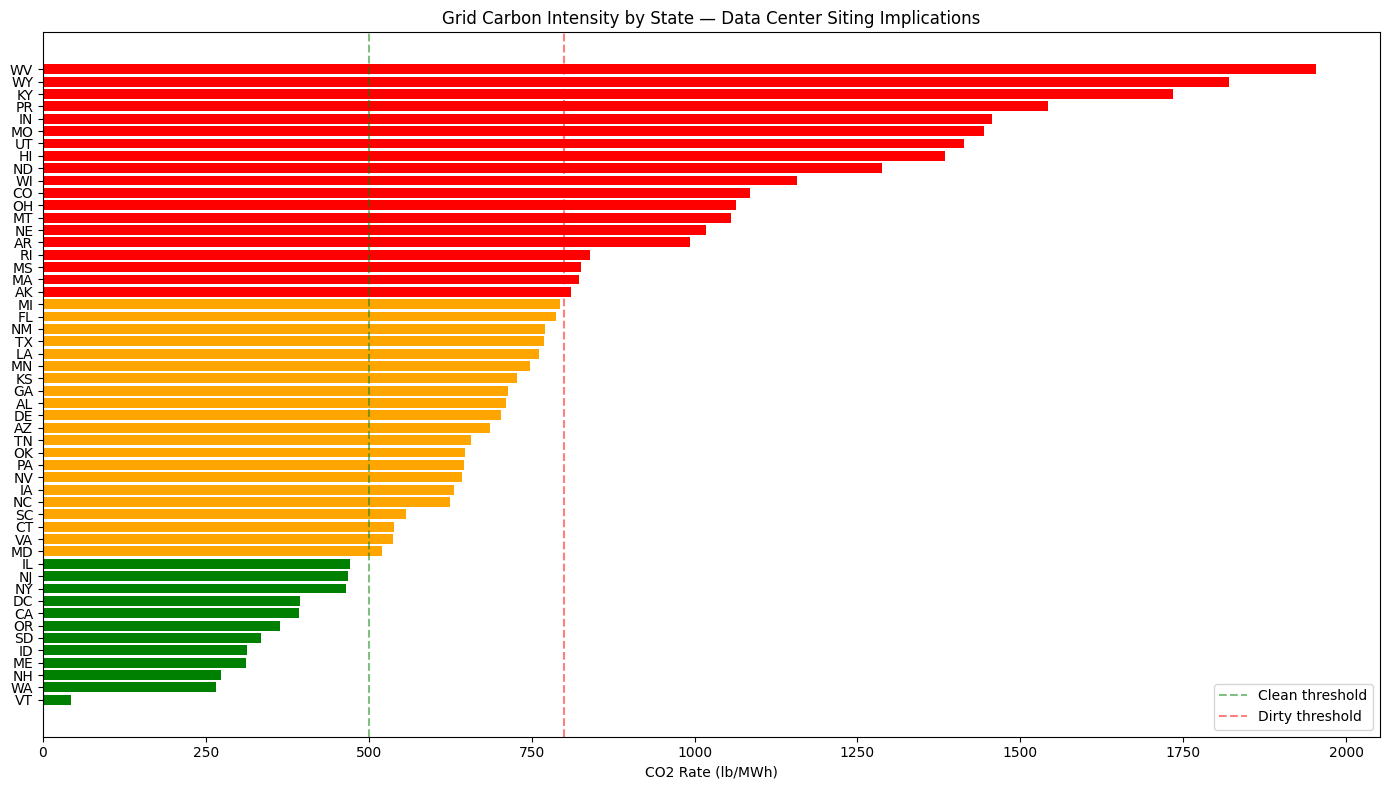

In [36]:
import matplotlib.pyplot as plt

# Sort by co2 rate
egrid_sorted = egrid_clean.sort_values('co2_rate_lb_mwh', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['green' if x < 500 else 'orange' if x < 800 else 'red' 
          for x in egrid_sorted['co2_rate_lb_mwh']]

ax.barh(egrid_sorted['state'], egrid_sorted['co2_rate_lb_mwh'], color=colors)

ax.axvline(x=500, color='green', linestyle='--', alpha=0.5, label='Clean threshold')
ax.axvline(x=800, color='red', linestyle='--', alpha=0.5, label='Dirty threshold')

ax.set_xlabel('CO2 Rate (lb/MWh)')
ax.set_title('Grid Carbon Intensity by State — Data Center Siting Implications')
ax.legend()

plt.tight_layout()
plt.savefig('carbon_by_state.png', dpi=150)
plt.show()

In [38]:
import pandas as pd
import json

# Load geojson manually
with open('datasets/im3_projected_data_centers/high_growth/high_growth_0_market_gravity.geojson') as f:
    data = json.load(f)

# Extract just the properties (no geometry)
rows = [feature['properties'] for feature in data['features']]
im3 = pd.DataFrame(rows)

# Check state column
print(im3['region'].unique())

<StringArray>
[       'alabama',        'arizona',     'california',       'colorado',
    'connecticut',        'florida',        'georgia',       'illinois',
        'indiana',           'iowa',       'kentucky',  'massachusetts',
       'michigan',      'minnesota',       'missouri',        'montana',
       'nebraska',         'nevada',     'new_jersey',     'new_mexico',
       'new_york', 'north_carolina',   'north_dakota',           'ohio',
       'oklahoma',         'oregon',   'pennsylvania', 'south_carolina',
      'tennessee',          'texas',           'utah',       'virginia',
     'washington',        'wyoming']
Length: 34, dtype: str


In [39]:
# State name to abbreviation mapping
state_map = {
    'alabama': 'AL', 'arizona': 'AZ', 'california': 'CA',
    'colorado': 'CO', 'connecticut': 'CT', 'florida': 'FL',
    'georgia': 'GA', 'illinois': 'IL', 'indiana': 'IN',
    'iowa': 'IA', 'kentucky': 'KY', 'massachusetts': 'MA',
    'michigan': 'MI', 'minnesota': 'MN', 'missouri': 'MO',
    'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV',
    'new_jersey': 'NJ', 'new_mexico': 'NM', 'new_york': 'NY',
    'north_carolina': 'NC', 'north_dakota': 'ND', 'ohio': 'OH',
    'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA',
    'south_carolina': 'SC', 'tennessee': 'TN', 'texas': 'TX',
    'utah': 'UT', 'virginia': 'VA', 'washington': 'WA',
    'wyoming': 'WY'
}

# Map to abbreviation
im3['state'] = im3['region'].map(state_map)

# Join eGRID
im3_merged = im3.merge(egrid_clean, on='state', how='left')

# Check
print(im3_merged[['region', 'state', 'data_center_it_power_mw', 'co2_rate_lb_mwh']].head(10))

    region state  data_center_it_power_mw  co2_rate_lb_mwh
0  alabama    AL                       36          710.988
1  alabama    AL                       36          710.988
2  alabama    AL                       36          710.988
3  alabama    AL                       36          710.988
4  alabama    AL                       36          710.988
5  alabama    AL                       36          710.988
6  alabama    AL                       36          710.988
7  alabama    AL                       36          710.988
8  alabama    AL                       36          710.988
9  arizona    AZ                       36          686.688


In [46]:
import plotly.graph_objects as go

# State centroids (lat/lon) - no libraries needed
state_centroids = {
    'AL': (32.8, -86.8), 'AZ': (34.3, -111.1), 'CA': (36.8, -119.4),
    'CO': (39.0, -105.5), 'CT': (41.6, -72.7), 'FL': (27.8, -81.7),
    'GA': (32.2, -83.4), 'IL': (40.0, -89.2), 'IN': (40.3, -86.1),
    'IA': (42.0, -93.2), 'KY': (37.5, -85.3), 'MA': (42.3, -71.8),
    'MI': (44.3, -85.4), 'MN': (46.4, -93.1), 'MO': (38.5, -92.5),
    'MT': (47.0, -110.0), 'NE': (41.5, -99.9), 'NV': (38.5, -117.1),
    'NJ': (40.1, -74.5), 'NM': (34.5, -106.2), 'NY': (42.9, -75.5),
    'NC': (35.6, -79.8), 'ND': (47.5, -100.5), 'OH': (40.4, -82.8),
    'OK': (35.6, -96.9), 'OR': (44.6, -122.1), 'PA': (40.6, -77.2),
    'SC': (33.9, -80.9), 'TN': (35.9, -86.4), 'TX': (31.5, -99.3),
    'UT': (39.4, -111.1), 'VA': (37.8, -78.2), 'WA': (47.4, -120.4),
    'WY': (43.0, -107.5)
}

# Aggregate by state
state_summary = im3_merged.groupby('state').agg(
    co2_rate=('co2_rate_lb_mwh', 'mean'),
    num_facilities=('data_center_it_power_mw', 'count'),
    total_mw=('data_center_it_power_mw', 'sum')
).reset_index()

state_summary['lat'] = state_summary['state'].map(lambda x: state_centroids.get(x, (0,0))[0])
state_summary['lon'] = state_summary['state'].map(lambda x: state_centroids.get(x, (0,0))[1])
state_summary['color'] = state_summary['co2_rate'].apply(
    lambda x: 'green' if x < 500 else 'yellow' if x < 800 else 'red'
)

# Plot
fig = go.Figure()
for color, label in [('green', 'Good (<500)'), ('yellow', 'Neutral (500-800)'), ('red', 'Bad (>800)')]:
    subset = state_summary[state_summary['color'] == color]
    fig.add_trace(go.Scattergeo(
        lon=subset['lon'], lat=subset['lat'],
        mode='markers',
        marker=dict(size=8, color=color, opacity=0.7),
        name=label,
        hovertext=subset['state'] + '<br>' +
                  'CO2: ' + subset['co2_rate'].round(1).astype(str) + ' lb/MWh<br>' +
                  'Facilities: ' + subset['num_facilities'].astype(str) + '<br>' +
                  'Total MW: ' + subset['total_mw'].astype(str)
    ))

fig.update_layout(
    title='Projected Data Center Locations — Grid Sustainability Rating',
    geo_scope='usa'
)

fig.show()
fig.write_html('datacenter_dots_map.html')

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

state_total_mw = im3_merged.groupby('state')['data_center_it_power_mw'].sum()
im3_merged['state_total_mw'] = im3_merged['state'].map(state_total_mw)
im3_merged['grid_norm'] = scaler.fit_transform(im3_merged[['state_total_mw']])

print(im3_merged[['region', 'state_total_mw', 'grid_norm']].head(10))

    region  state_total_mw  grid_norm
0  alabama             324   0.039024
1  alabama             324   0.039024
2  alabama             324   0.039024
3  alabama             324   0.039024
4  alabama             324   0.039024
5  alabama             324   0.039024
6  alabama             324   0.039024
7  alabama             324   0.039024
8  alabama             324   0.039024
9  arizona            1368   0.180488


In [56]:
# Load the subregion renewables sheet
srl = pd.read_excel('datasets/egrid2023_data_rev2 (2).xlsx', 
                    sheet_name='SRL23', 
                    skiprows=1)

# Get just what you need
srl_clean = srl[['SUBRGN', 'SRNAME', 'SRTRPR']].copy()
srl_clean.columns = ['subregion', 'subregion_name', 'renewable_pct']
print(srl_clean.head())

  subregion      subregion_name  renewable_pct
0      AKGD    ASCC Alaska Grid          0.163
1      AKMS  ASCC Miscellaneous          0.690
2      AZNM      WECC Southwest          0.223
3      CAMX     WECC California          0.465
4      ERCT           ERCOT All          0.287


In [58]:
# Normalize carbon (higher = worse)
im3_merged['carbon_norm'] = scaler.fit_transform(im3_merged[['co2_rate_lb_mwh']])

# Normalize renewable % (higher = better, so flip it)
# First join renewable_pct to im3_merged by state
# srl_clean is at subregion level so use state level instead
st_renew = df[['PSTATABB', 'STTRPR']].copy()
st_renew.columns = ['state', 'renewable_pct']
im3_merged = im3_merged.merge(st_renew, on='state', how='left')

# Normalize renewable (flip so higher renewable = lower score = better)
im3_merged['renew_norm'] = 1 - scaler.fit_transform(im3_merged[['renewable_pct']])

# Combined sustainability score from just these two
im3_merged['sustainability_score'] = (1 - (
    im3_merged['carbon_norm'] * 0.6 +
    im3_merged['renew_norm'] * 0.4
)) * 100

# Results
results = im3_merged.groupby('region')['sustainability_score'].mean().sort_values(ascending=False)
print(results)

region
washington        100.000000
oregon             92.215480
california         82.242688
iowa               81.708260
oklahoma           70.015039
new_york           68.563778
new_mexico         66.123054
nevada             66.055310
minnesota          59.131776
montana            58.505543
illinois           58.432295
texas              55.464533
virginia           53.540896
north_carolina     52.924187
new_jersey         52.282787
south_carolina     50.683697
arizona            50.321119
tennessee          50.053750
connecticut        49.888744
nebraska           49.484290
colorado           49.282592
massachusetts      48.622285
georgia            47.810520
alabama            46.578741
pennsylvania       45.314265
michigan           43.956879
north_dakota       42.718052
florida            42.135483
ohio               29.672816
utah               24.921023
indiana            19.924211
missouri           19.818043
wyoming            11.890244
kentucky            5.913196
Name: s